## 1. 선형회귀 실습 -  sklearn 

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 데이터 읽어오기

In [2]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


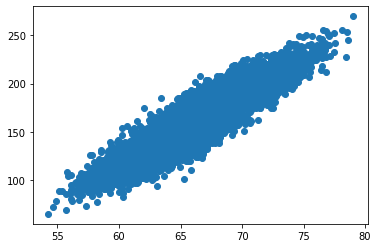

In [3]:
x = df["Height"]
y = df["Weight"]
plt.plot(x, y, 'o')
plt.show()

In [ ]:
x.values.shape

(10000,)

### 데이터셋 분할 (Train / Test)

In [4]:
from sklearn.model_selection import train_test_split
x = df[['Height']]
y = df[['Weight']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

### 모델 생성 및 학습

In [15]:
type(x_train.values)

numpy.ndarray

In [16]:
lr = LinearRegression()
lr.fit(x_train.values, y_train.values)

LinearRegression()

### 모델 활용 (예측)

In [17]:
lr.predict([[70]])


array([[189.46335111]])

### 모델 계수 확인

In [18]:
lr.coef_


array([[7.70430886]])

In [19]:
lr.intercept_

array([-349.83826892])

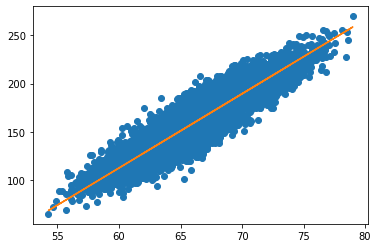

In [20]:
plt.plot(x, y, 'o')
plt.plot(x,lr.predict(x.values.reshape(-1,1)))
plt.show()

### 모델 평가 : 결정계수 $R^2$
- $1- {u}/{v}$
- $u$ : RSS(residual sum of squre) (잔차의 제곱의 평균)
  - ```((y - y_predict)**2)).sum()```
- $v$ : TSS(total sum of squre) (y값의 총 변화량) 
  - ```((y-y.mean())**2).sum()```
- 결정계수 $R^2$가 클수록 실제값과 예측값이 유사함을 의미 
  - 0.75 이상이면 양호한 것으로 평가

In [22]:
print(lr.score(x_test.values, y_test.values))
# Return the coefficient of determination of the prediction.

0.8564416297018895


## 2. 다중선형회귀

### 데이터 읽어오기

In [ ]:
import pandas as pd
df = pd.read_csv("manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


### 데이터셋 분할 (Train / Test)

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

### 모델 생성 및 학습

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

### 모델 활용 (예측)

In [ ]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = mlr.predict(my_apartment)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
my_predict

array([[2270.415198]])

In [ ]:
y_predict = mlr.predict(x_test)

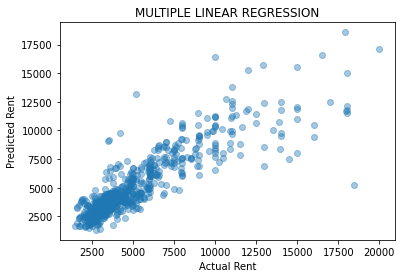

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 모델 계수 확인

In [ ]:
print(mlr.coef_)

[[-281.66184588 1166.72321641    4.88529595  -13.68162625   23.7299474
    -7.48120853 -137.63633968   54.44897506  165.35349181 -146.18762626
   114.53674833  -93.98080863 -214.04724371   -5.16273711]]


In [ ]:
print(mlr.intercept_)

[-434.88425007]


### 모델 평가 : 결정계수 $R^2$

In [ ]:
print(mlr.score(x_test, y_test))

0.7659757504756245
